In [64]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import statistics

## Note

`cv2.imshow()` will not work in a notebook, even though the OpenCV tutorials use it. Instead, use `plt.imshow` and family to visualize your results.

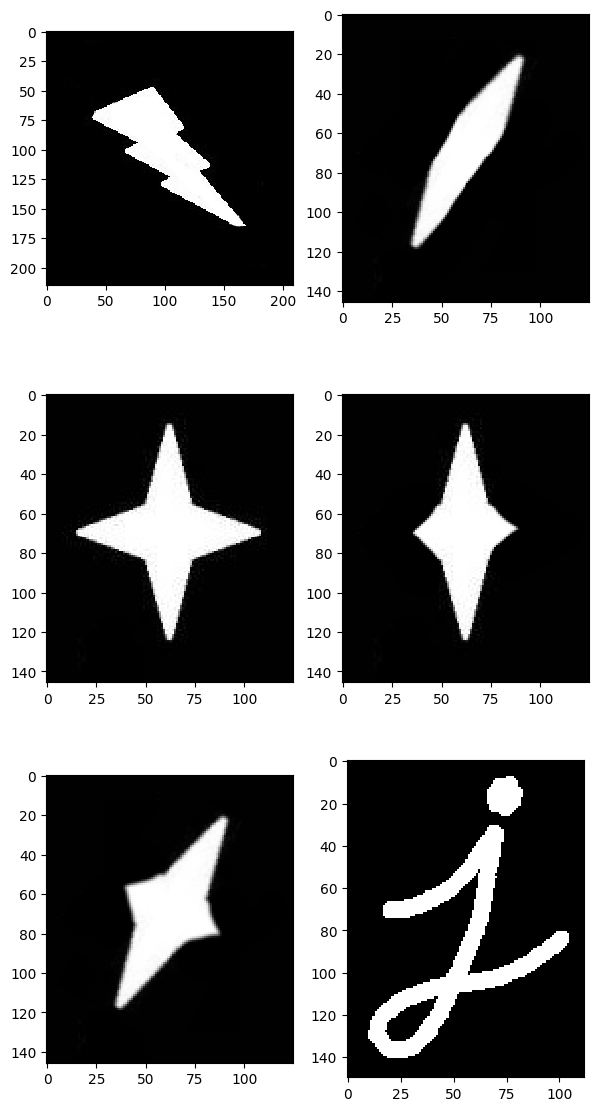

In [65]:
lightningbolt      = cv2.imread('shapes/lightningbolt.png', cv2.IMREAD_GRAYSCALE)
blob               = cv2.imread('shapes/blob.png', cv2.IMREAD_GRAYSCALE)
star               = cv2.imread('shapes/star.png', cv2.IMREAD_GRAYSCALE)
squishedstar       = cv2.imread('shapes/squishedstar.png', cv2.IMREAD_GRAYSCALE)
squishedturnedstar = cv2.imread('shapes/squishedturnedstar.png', cv2.IMREAD_GRAYSCALE)
letterj            = cv2.imread('shapes/letterj.png', cv2.IMREAD_GRAYSCALE)

images = [lightningbolt, blob, star, squishedstar, squishedturnedstar, letterj]

fig,ax = plt.subplots(nrows=3, ncols=2)
for a,i in zip(ax.flatten(), images):
    a.imshow(i, cmap='gray', interpolation='none');
fig.set_size_inches(7,14);

In [66]:
intensity_values = set(lightningbolt.flatten())
print(len(intensity_values))

75


## Question:

What would you expect the value to be, visually? What explains the actual value?

In [67]:
# TODO
# What this is asking is what the intensity of the pixel at the center of the lightning bolt is.
#the center of the image is white, meaning it has a value of 255. The actual value is different because in real life we cannot expect anything to be fully white due to lighting conditions, etc

## Thresholding

https://docs.opencv.org/3.4.1/d7/d4d/tutorial_py_thresholding.html

2


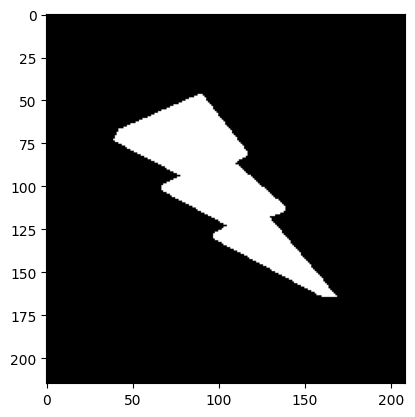

In [68]:
_, lightningbolt = cv2.threshold(lightningbolt,200,255,cv2.THRESH_BINARY)

intensity_values = set(lightningbolt.flatten())
print(len(intensity_values))

plt.imshow(lightningbolt, cmap='gray');

## Question
What happens when the above values are used for thresholding? What is a "good" value for thresholding the above images? Why?

In [69]:
## TODO
## The above code is asking to threshold the image at a value of 200, which means that any pixel with an intensity greater than 200 will be set to 255 (white), and any pixel with an intensity less than or equal to 200 will be set to 0 (black).
## a good value to threshold the image would be 127, because it is the midpoint of the intensity range (0-255). This would effectively separate the lighter pixels from the darker ones, making it easier to analyze the image.

# Exercises

**Steps**

1. Read each tutorial
    * Skim all parts of each tutorial to understand what each operation does
    * Focus on the part you will need for the requested transformation
2. Apply the transformation and visualize it

## 1. Blend lightningbolt and blob together
https://docs.opencv.org/3.4.1/d0/d86/tutorial_py_image_arithmetics.html

*Remember:* Don't use `imshow` from OpenCV, use `imshow` from `matplotlib`

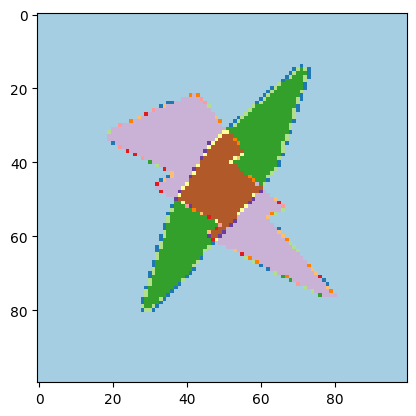

In [70]:
# 1. Blend
# TODO
import cv2 as cv
lightningmod = cv.resize(lightningbolt, (100, 100))
blobmod = cv.resize(blob, (100, 100))

blend = cv.addWeighted(lightningmod,0.7,blobmod,0.3,0)
plt.imshow(blend, cmap='Paired');


## 2. Find a ROI which contains the point of the lightning bolt

https://docs.opencv.org/3.4.1/d3/df2/tutorial_py_basic_ops.html

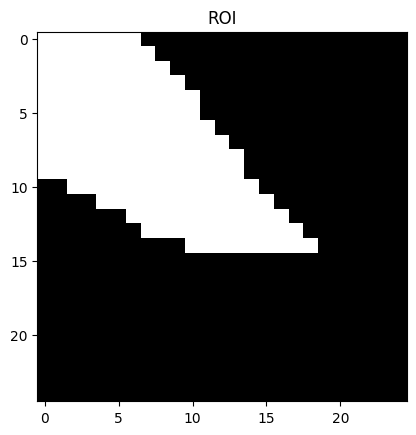

In [71]:
# 2. ROI
# TODO
x1, y1, x2, y2 = 150, 150, 175, 175 # Example coordinates
roi = lightningbolt[y1:y2, x1:x2]

plt.imshow(roi, cmap='gray')
plt.title('ROI')
plt.show()

## 3. Use an averaging kernel on the letter j

https://docs.opencv.org/3.4.1/d4/d13/tutorial_py_filtering.html

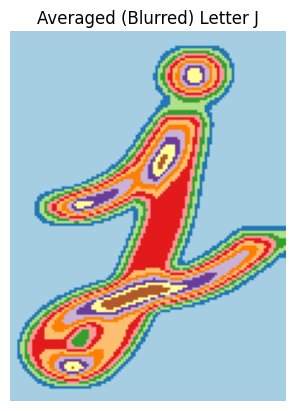

In [72]:
# 3. 
# TODO
kernel_size = (20, 10)  # You can change the size for more/less blur
blurred_j = cv2.blur(letterj, kernel_size)

plt.imshow(blurred_j, cmap='Paired')
plt.title('Averaged (Blurred) Letter J')
plt.axis('off')
plt.show()

# Morphology

https://docs.opencv.org/3.4.1/d9/d61/tutorial_py_morphological_ops.html

## 4. Perform erosion on j with a 3x3 kernel

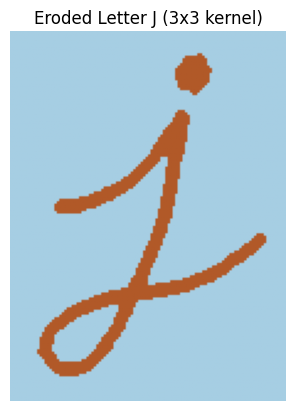

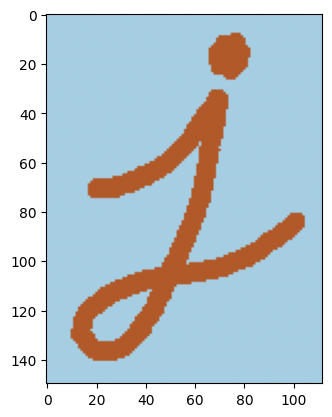

In [75]:
# 4
# TODO
# 4. Perform erosion on j with a 3x3 kernel
kernel = np.ones((3, 3), np.uint8)
eroded_j = cv2.erode(letterj, kernel, iterations=1)

plt.imshow(eroded_j, cmap='Paired')
plt.title('Eroded Letter J (3x3 kernel)')
plt.axis('off')
plt.show()

plt.imshow(letterj, cmap='Paired')



## 5. Perform erosion on j with a 5x5 kernel

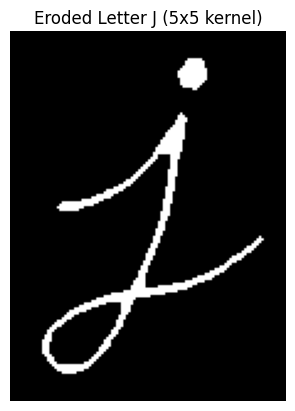

In [76]:
# 5
# TODO

# 5. Perform erosion on j with a 5x5 kernel
kernel_5x5 = np.ones((5, 5), np.uint8)
eroded_j_5x5 = cv2.erode(letterj, kernel_5x5, iterations=1)

plt.imshow(eroded_j_5x5, cmap='gray')
plt.title('Eroded Letter J (5x5 kernel)')
plt.axis('off')
plt.show()

## 6. Perform erosion on j with __two__ iterations, using a kernel size of your choice

Hint: look at the OpenCV API documentation. It is possible to perform two iterations of erosion in one line of Python!

https://docs.opencv.org/3.4.1/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb



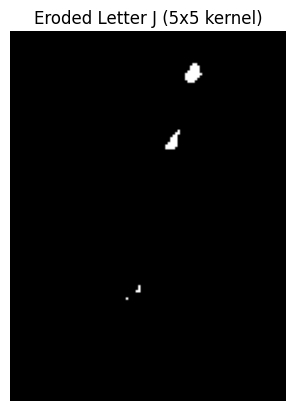

In [77]:
# 5. Perform erosion on j with a 5x5 kernel
kernel_5x5 = np.ones((5, 5), np.uint8)
eroded_j_5x5 = cv2.erode(letterj, kernel_5x5, iterations=2)

plt.imshow(eroded_j_5x5, cmap='gray')
plt.title('Eroded Letter J (5x5 kernel)')
plt.axis('off')
plt.show()

## 7. Perform dilation on j with a 3x3 kernel

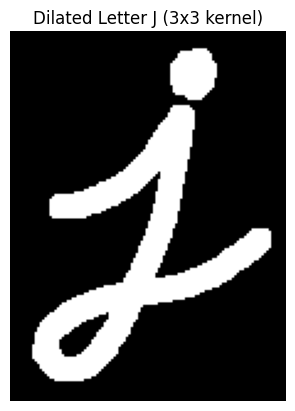

In [78]:
# 7
# TODO
# 7. Perform dilation on j with a 3x3 kernel
kernel_3x3 = np.ones((3, 3), np.uint8)
dilated_j_3x3 = cv2.dilate(letterj, kernel_3x3, iterations=1)

plt.imshow(dilated_j_3x3, cmap='gray')
plt.title('Dilated Letter J (3x3 kernel)')
plt.axis('off')
plt.show()

## 8. Perform dilation on j with a 5x5 kernel

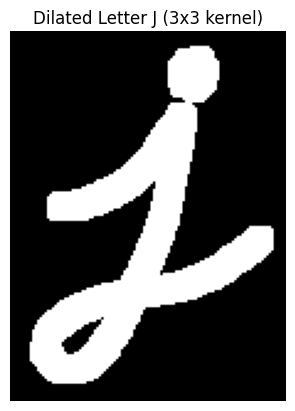

In [79]:
# 8
# TODO
# 7. Perform dilation on j with a 3x3 kernel
kernel_3x3 = np.ones((5, 5), np.uint8)
dilated_j_3x3 = cv2.dilate(letterj, kernel_3x3, iterations=1)

plt.imshow(dilated_j_3x3, cmap='gray')
plt.title('Dilated Letter J (3x3 kernel)')
plt.axis('off')
plt.show()

## 9. What is the effect of kernel size on morphology operations?

In [ ]:
# 9
# TODO
#kernel size affects the area that is affecected by the morphological operation. A larger kernel will affect a larger area, while a smaller kernel will affect a smaller area. This can be useful for controlling the amount of detail that is preserved or removed in the image.

## 10. What is the difference betweeen repeated iterations of a morphology operation with a small kernel, versus a single iteration with a large kernel?

In [ ]:
# 10
# TODO
#with a small kernel with repeated iterations, you are affecting a smaller area of the image multiple times, which can increase detail preservation or removal depending on the operation (erosion or dilation). This can lead to a more refined result compared to using a larger kernel with fewer iterations, which may produce a more generalized effect.
#with a large kernel with one iteration, you are affecting a larger area of the image at once, which can lead to a more pronounced effect but may also result in loss of detail. This can be useful for quickly removing noise or small features from the image, but may not preserve finer details as well as using a smaller kernel with multiple iterations.

## 11. Rotate the lightningbolt and star by 90 degrees

https://docs.opencv.org/3.4.1/da/d6e/tutorial_py_geometric_transformations.html

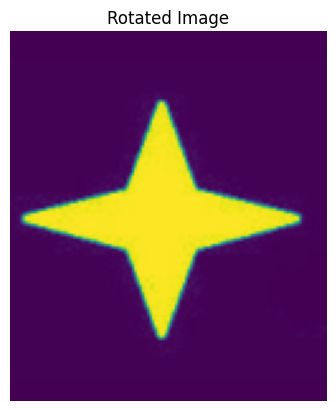

In [82]:
rows, cols = star.shape[:2]
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 90, 1)
dst = cv2.warpAffine(star, M, (cols, rows))

plt.imshow(dst)
plt.title('Rotated Image')
plt.axis('off')
plt.show()

## 12. STRETCH GOAL: 

Visualize the result of Laplacian, Sobel X, and Sobel Y on all of the images. Also, produce a combined image of both Sobel X and Sobel Y for each image. Is Exercise 1 the best way to do this? Are there other options? 

You should have 4 outputs (Laplacian, SobelX, SobelY, and the combination) for each input image visualized at the end.

https://docs.opencv.org/3.4.1/d5/d0f/tutorial_py_gradients.html

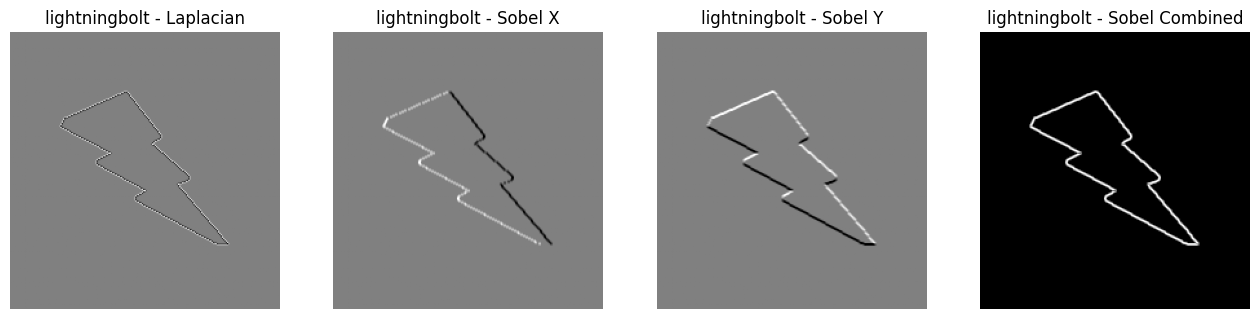

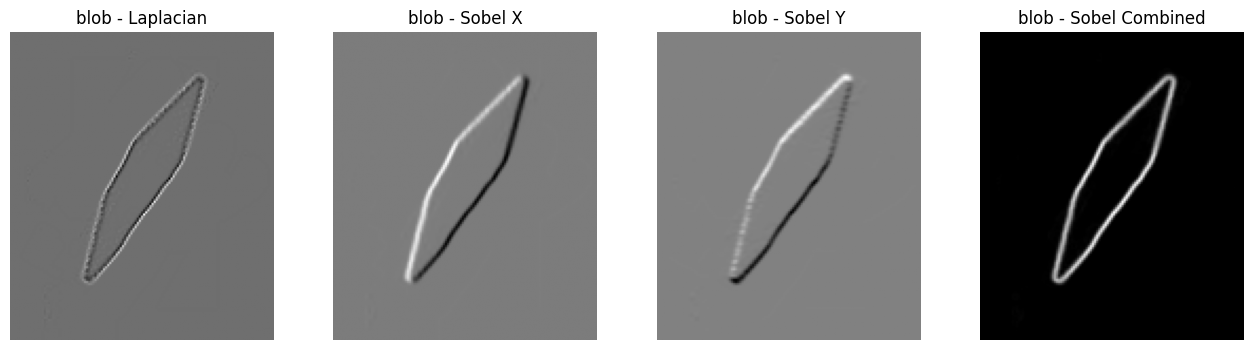

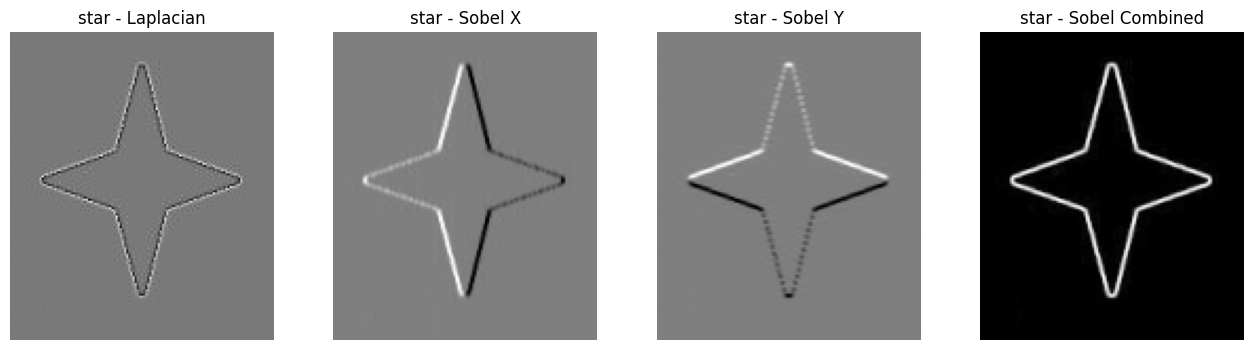

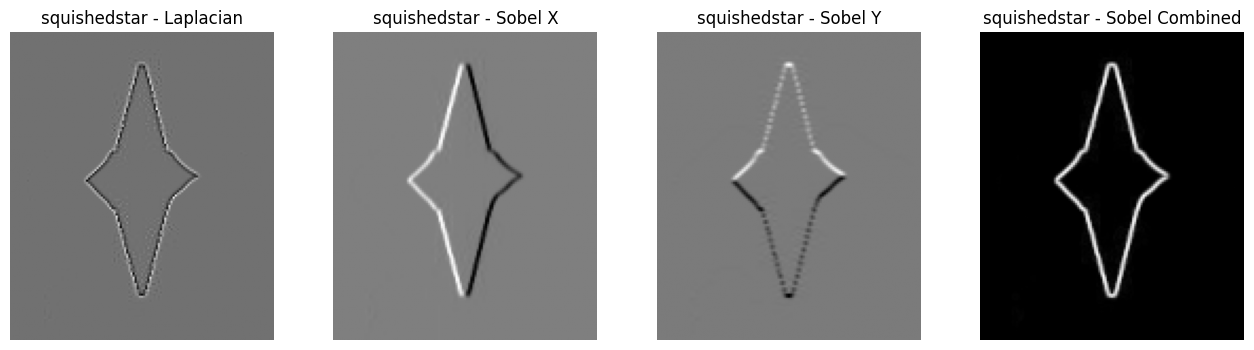

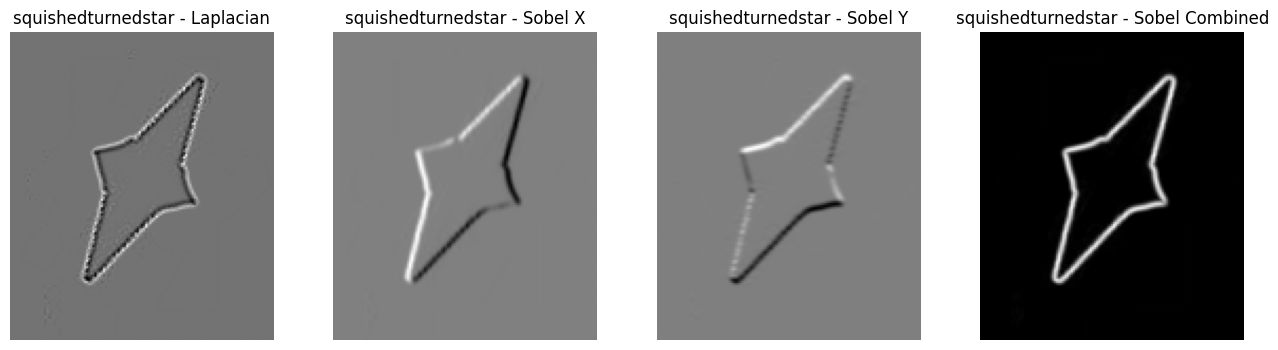

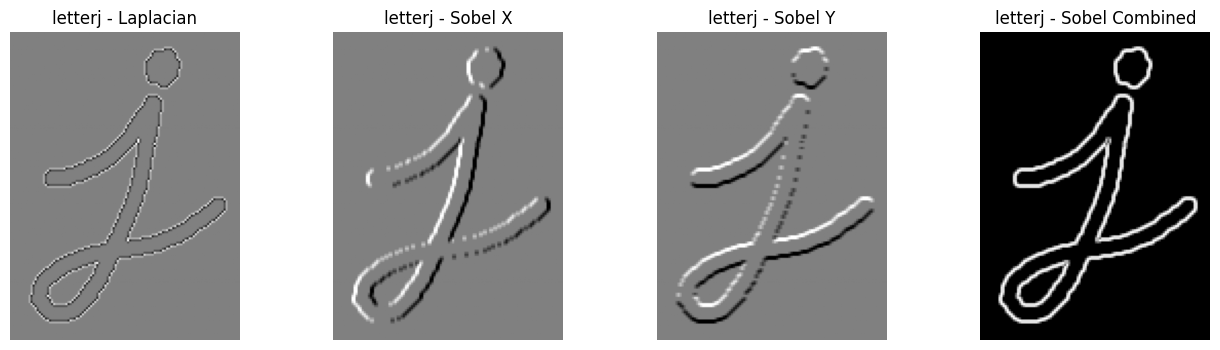

In [83]:
# 12. STRETCH GOAL: Visualize Laplacian, Sobel X, Sobel Y, and their combination for all images

image_names = ['lightningbolt', 'blob', 'star', 'squishedstar', 'squishedturnedstar', 'letterj']
image_list = [lightningbolt, blob, star, squishedstar, squishedturnedstar, letterj]

for name, img in zip(image_names, image_list):
    laplacian = cv2.Laplacian(img, cv2.CV_64F)
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.magnitude(sobelx, sobely)

    fig, axs = plt.subplots(1, 4, figsize=(16, 4))
    axs[0].imshow(laplacian, cmap='gray')
    axs[0].set_title(f'{name} - Laplacian')
    axs[1].imshow(sobelx, cmap='gray')
    axs[1].set_title(f'{name} - Sobel X')
    axs[2].imshow(sobely, cmap='gray')
    axs[2].set_title(f'{name} - Sobel Y')
    axs[3].imshow(sobel_combined, cmap='gray')
    axs[3].set_title(f'{name} - Sobel Combined')
    for ax in axs:
        ax.axis('off')
    plt.show()

## When you are done:

You should have one or more images for each exercise.

1. Double-check that you filled in your name at the top of the notebook!
2. Click `File` -> `Export Notebook As` -> `PDF`
3. Email the PDF to `YOURTEAMNAME@beaver.works` 